In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

# target은 정답

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [3]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df['target'] = housing.target # target은 중간 주택값
df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info() # data 타입 제일 먼저 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
df.isnull().sum() # 결측치 확인

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

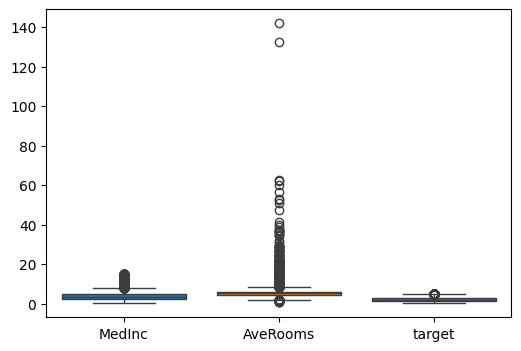

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=df[['MedInc', 'AveRooms', 'target']])
plt.show()

IQR vs Z-Score -> 정규분포는 Z-score

## 이상치 제거 함수

In [10]:
def remove_iqr(df,columns):     #['col1','col2']
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    return df_clean


In [11]:
print("Before : ", df.shape)

Before :  (20640, 9)


In [12]:
df_cleaned = remove_iqr(df, ['MedInc','AveRooms','target'])
print('After : ', df_cleaned.shape)

After :  (18818, 9)


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {
    'gender' : ['male','female','female','male','female'],
    'grade' : ['A','B','A','C','B']
}

df = pd.DataFrame(data)
df

,gender,grade
0,male,A
1,female,B
2,female,A
3,male,C
4,female,B


In [ ]:
le_gender =  LabelEncoder() # one-hot 인코더도 사용 가능하다.
le_grade = LabelEncoder()

df['gender_encode'] = le_gender.fit_transform(df['gender'])
df['grade_encode'] = le_grade.fit_transform(df['grade'])

df

,gender,grade,gender_encode,grade_encode
0,male,A,1,0
1,female,B,0,1
2,female,A,0,0
3,male,C,1,2
4,female,B,0,1


In [15]:
data = {
    'gender' : ['male','female','female','male','female'],
    'grade' : ['A','B','A','C','B']
}

df = pd.DataFrame(data)
df

,gender,grade
0,male,A
1,female,B
2,female,A
3,male,C
4,female,B


In [17]:
df = pd.get_dummies(df, columns=['grade']) # one-hot 인코더 사용. 
df

,gender_female,gender_male,grade_A,grade_B,grade_C
0,False,True,True,False,False
1,True,False,False,True,False
2,True,False,True,False,False
3,False,True,False,False,True
4,True,False,False,True,False


# 스케일링

In [24]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
# train data set을 기준으로 스케일 작업을 진행 -> 이걸 가지고 test에 적용 해야됨.

data = {
    'height' : [150,160,165,180,155],
    'weight' : [60,65,55,90,62]
}

df = pd.DataFrame(data)



std_scaler = StandardScaler() #표준화

df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=['height_std','weight_std'])
df_std

minmax_scaler = MinMaxScaler()

df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=['height_mm','weight_mm'])
df_minmax

,height_mm,weight_mm
0,0.000000,0.142857
1,0.333333,0.285714
2,0.500000,0.000000
3,1.000000,1.000000
4,0.166667,0.200000


In [25]:
df_std

,height_std,weight_std
0,-1.165543,-0.522837
1,-0.194257,-0.114371
2,0.291386,-0.931303
3,1.748315,1.927960
4,-0.679900,-0.359450


# iris - 분류

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [27]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y = iris.target
y

# 이 상태로 데이터를 나누게 될 시에, 데이터 불균형이 생긴다. (한 쪽에 2가 몰리게 됨 -> 섞어줘야함.)
# y 기준으로 섞어줘야함. train data 와 test data 를 8:2 로 나눌 때, 80퍼 안에도 0,1,2가 골고루 들어가있어야됨.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y) # 분류 문제는 무조건 stratify 넣어줘야함(y 기준으로 비율을 맞춰서 8:2로 나누겠다 라는 뜻)
# 모델 성능 평가를 하려면, 똑같은 data set을 사용해야한다. split 은 랜덤으로 데이터를 나누기 때문에 그래서 random_state=42 을 추가해서 고정해야됨.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120,)
(30,)


In [33]:
import pandas as pd

df = pd.DataFrame(data=iris.data , columns = iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
X = df.drop('target', axis=1) # 정답을 뺀 것 
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# K-fold

In [1]:
# 데이터 양이 적은 경우

In [38]:
# k-fold

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


X,y = load_iris(return_X_y=True)

model = RandomForestClassifier()

score = cross_val_score(model,X,y,cv=5)
score

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [39]:
score.mean()

np.float64(0.9666666666666668)

In [ ]:
from sklearn.model_selection import StratifiedKFold

## 클래스 비율을 각 Fold마다 균등하게 유지한다


cv = StratifiedKFold(n_splits=5) # -> 정답의 비율을 맞춰줌. (Only 분류)
model = RandomForestClassifier()

score = cross_val_score(model,X,y,cv=cv)
score

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])